In [3]:
import Bio
Bio.__version__

'1.70'

In [6]:
from Bio import SeqIO
from Bio.KEGG.REST import *
from Bio.KEGG.KGML import KGML_parser
from Bio.Graphics.KGML_vis import KGMLCanvas
from Bio.Graphics.ColorSpiral import ColorSpiral
from IPython.display import Image, HTML
import random

In [7]:
# A bit of code that will help us display the PDF output
def PDF(filename):
    return HTML('<iframe src=%s width=700 height=350></iframe>' % filename)

# A bit of helper code to shorten long text
def head(text, lines=10):
    """ Print the first lines lines of the passed text.
    """
    print '\n'.join(text.split('\n')[:lines] + ['[...]'])

In [11]:
print kegg_info("kegg").read()
print kegg_info("pathway").read()
print kegg_info("hsa").read()

kegg             Kyoto Encyclopedia of Genes and Genomes
kegg             Release 83.0+/08-10, Aug 17
                 Kanehisa Laboratories
                 pathway     527,930 entries
                 brite       195,185 entries
                 module      424,521 entries
                 orthology    21,353 entries
                 genome        5,291 entries
                 genes     23,489,363 entries
                 compound     18,103 entries
                 glycan       11,015 entries
                 reaction     10,650 entries
                 rclass        3,111 entries
                 enzyme        7,008 entries
                 disease       1,873 entries
                 drug         10,347 entries
                 dgroup        2,267 entries
                 environ         856 entries

pathway          KEGG Pathway Database
path             Release 83.0+/08-10, Aug 17
                 Kanehisa Laboratories
                 527,930 entries

linked db        module
 

In [12]:
head(kegg_list('pathway', 'hsa').read())

path:hsa00010	Glycolysis / Gluconeogenesis - Homo sapiens (human)
path:hsa00020	Citrate cycle (TCA cycle) - Homo sapiens (human)
path:hsa00030	Pentose phosphate pathway - Homo sapiens (human)
path:hsa00040	Pentose and glucuronate interconversions - Homo sapiens (human)
path:hsa00051	Fructose and mannose metabolism - Homo sapiens (human)
path:hsa00052	Galactose metabolism - Homo sapiens (human)
path:hsa00053	Ascorbate and aldarate metabolism - Homo sapiens (human)
path:hsa00061	Fatty acid biosynthesis - Homo sapiens (human)
path:hsa00062	Fatty acid elongation - Homo sapiens (human)
path:hsa00071	Fatty acid degradation - Homo sapiens (human)
[...]


In [13]:
head(kegg_list('hsa').read())

hsa:100287010	uncharacterized LOC100287010
hsa:100288846	uncharacterized LOC100288846
hsa:222029	DKFZp434L192; uncharacterized protein DKFZp434L192
hsa:146512	uncharacterized protein FLJ30679
hsa:100128288	uncharacterized LOC100128288
hsa:200058	uncharacterized protein FLJ23867
hsa:100128573	uncharacterized LOC100128573
hsa:100289361	uncharacterized LOC100289361
hsa:645644	FLJ42627; uncharacterized LOC645644
hsa:100289230	uncharacterized LOC100289230
[...]


In [14]:
head(kegg_find('genes', 'tubulin').read())

hsa:107987035	tubulin beta chain-like
hsa:643224	TUBBP5; tubulin beta pseudogene 5
hsa:79739	TTLL7; tubulin tyrosine ligase like 7
hsa:164714	TTLL8; tubulin tyrosine ligase like 8
hsa:6903	TBCC, CFC; tubulin folding cofactor C
hsa:158135	TTLL11, C9orf20, bA244O19.1; tubulin tyrosine ligase like 11
hsa:113691	TUBA3FP; tubulin alpha 3f pseudogene
hsa:6902	TBCA; tubulin folding cofactor A
hsa:150465	TTL; tubulin tyrosine ligase
hsa:10383	TUBB4B, Beta2, TUBB2, TUBB2C; tubulin beta 4B class IVb
[...]


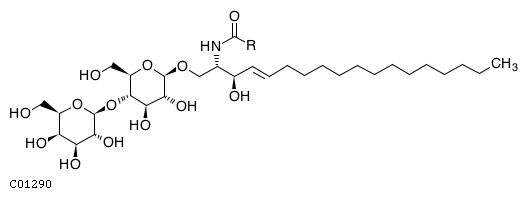

In [15]:
Image(kegg_get("cpd:C01290", "image").read())

In [16]:
# Pathway as database entry
head(kegg_get("hsa05130").read())

ENTRY       hsa05130                    Pathway
NAME        Pathogenic Escherichia coli infection - Homo sapiens (human)
DESCRIPTION Enteropathogenic E. coli (EPEC) and enterohemorrhagic E. coli (EHEC) are closely related pathogenic strains of Escherichia coli. The hallmark of EPEC/EHEC infections [DS:H00278 H00277] is induction of attaching and effacing (A/E) lesions that damage intestinal epithelial cells. The capacity to form A/E lesions is encoded mainly by the locus of enterocyte effacement (LEE) pathogenicity island. Tir, Map, EspF, EspG are known LEE-encoded effector proteins secreted via the type III secretion system, which is also LEE-encoded, into the host cell. EPEC and EHEC Tir's link the extracellular bacterium to the cell cytoskeleton. Map and EspF are involved in mitochondrion membrane permeabilization. EspG interacts with tubulins and stimulates microtubule destabilization. LEE-encoded adhesin or intimin (Eae) is exported via the general secretory pathway to the peripla

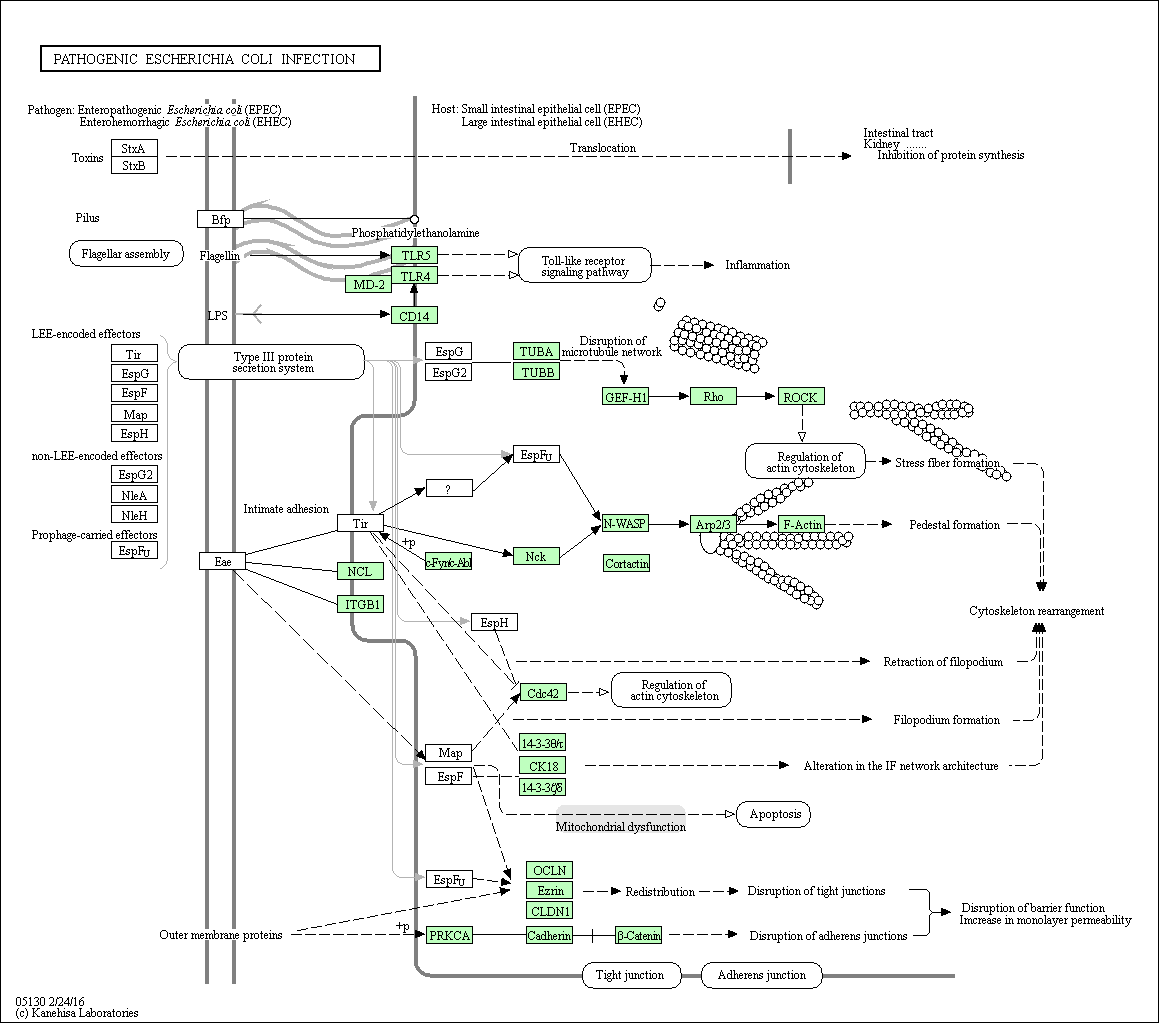

In [17]:
# Pathway as image (png)
Image(kegg_get("hsa05130", "image").read())

In [18]:
# Pathway as KGML
head(kegg_get("hsa05130", "kgml").read())

<?xml version="1.0"?>
<!DOCTYPE pathway SYSTEM "http://www.kegg.jp/kegg/xml/KGML_v0.7.2_.dtd">
<!-- Creation date: Feb 24, 2016 14:42:27 +0900 (GMT+9) -->
<pathway name="path:hsa05130" org="hsa" number="05130"
         title="Pathogenic Escherichia coli infection"
         image="http://www.kegg.jp/kegg/pathway/hsa/hsa05130.png"
         link="http://www.kegg.jp/kegg-bin/show_pathway?hsa05130">
    <entry id="1" name="path:hsa04810" type="map"
        link="http://www.kegg.jp/dbget-bin/www_bget?hsa04810">
        <graphics name="Regulation of actin cytoskeleton" fgcolor="#000000" bgcolor="#FFFFFF"
[...]


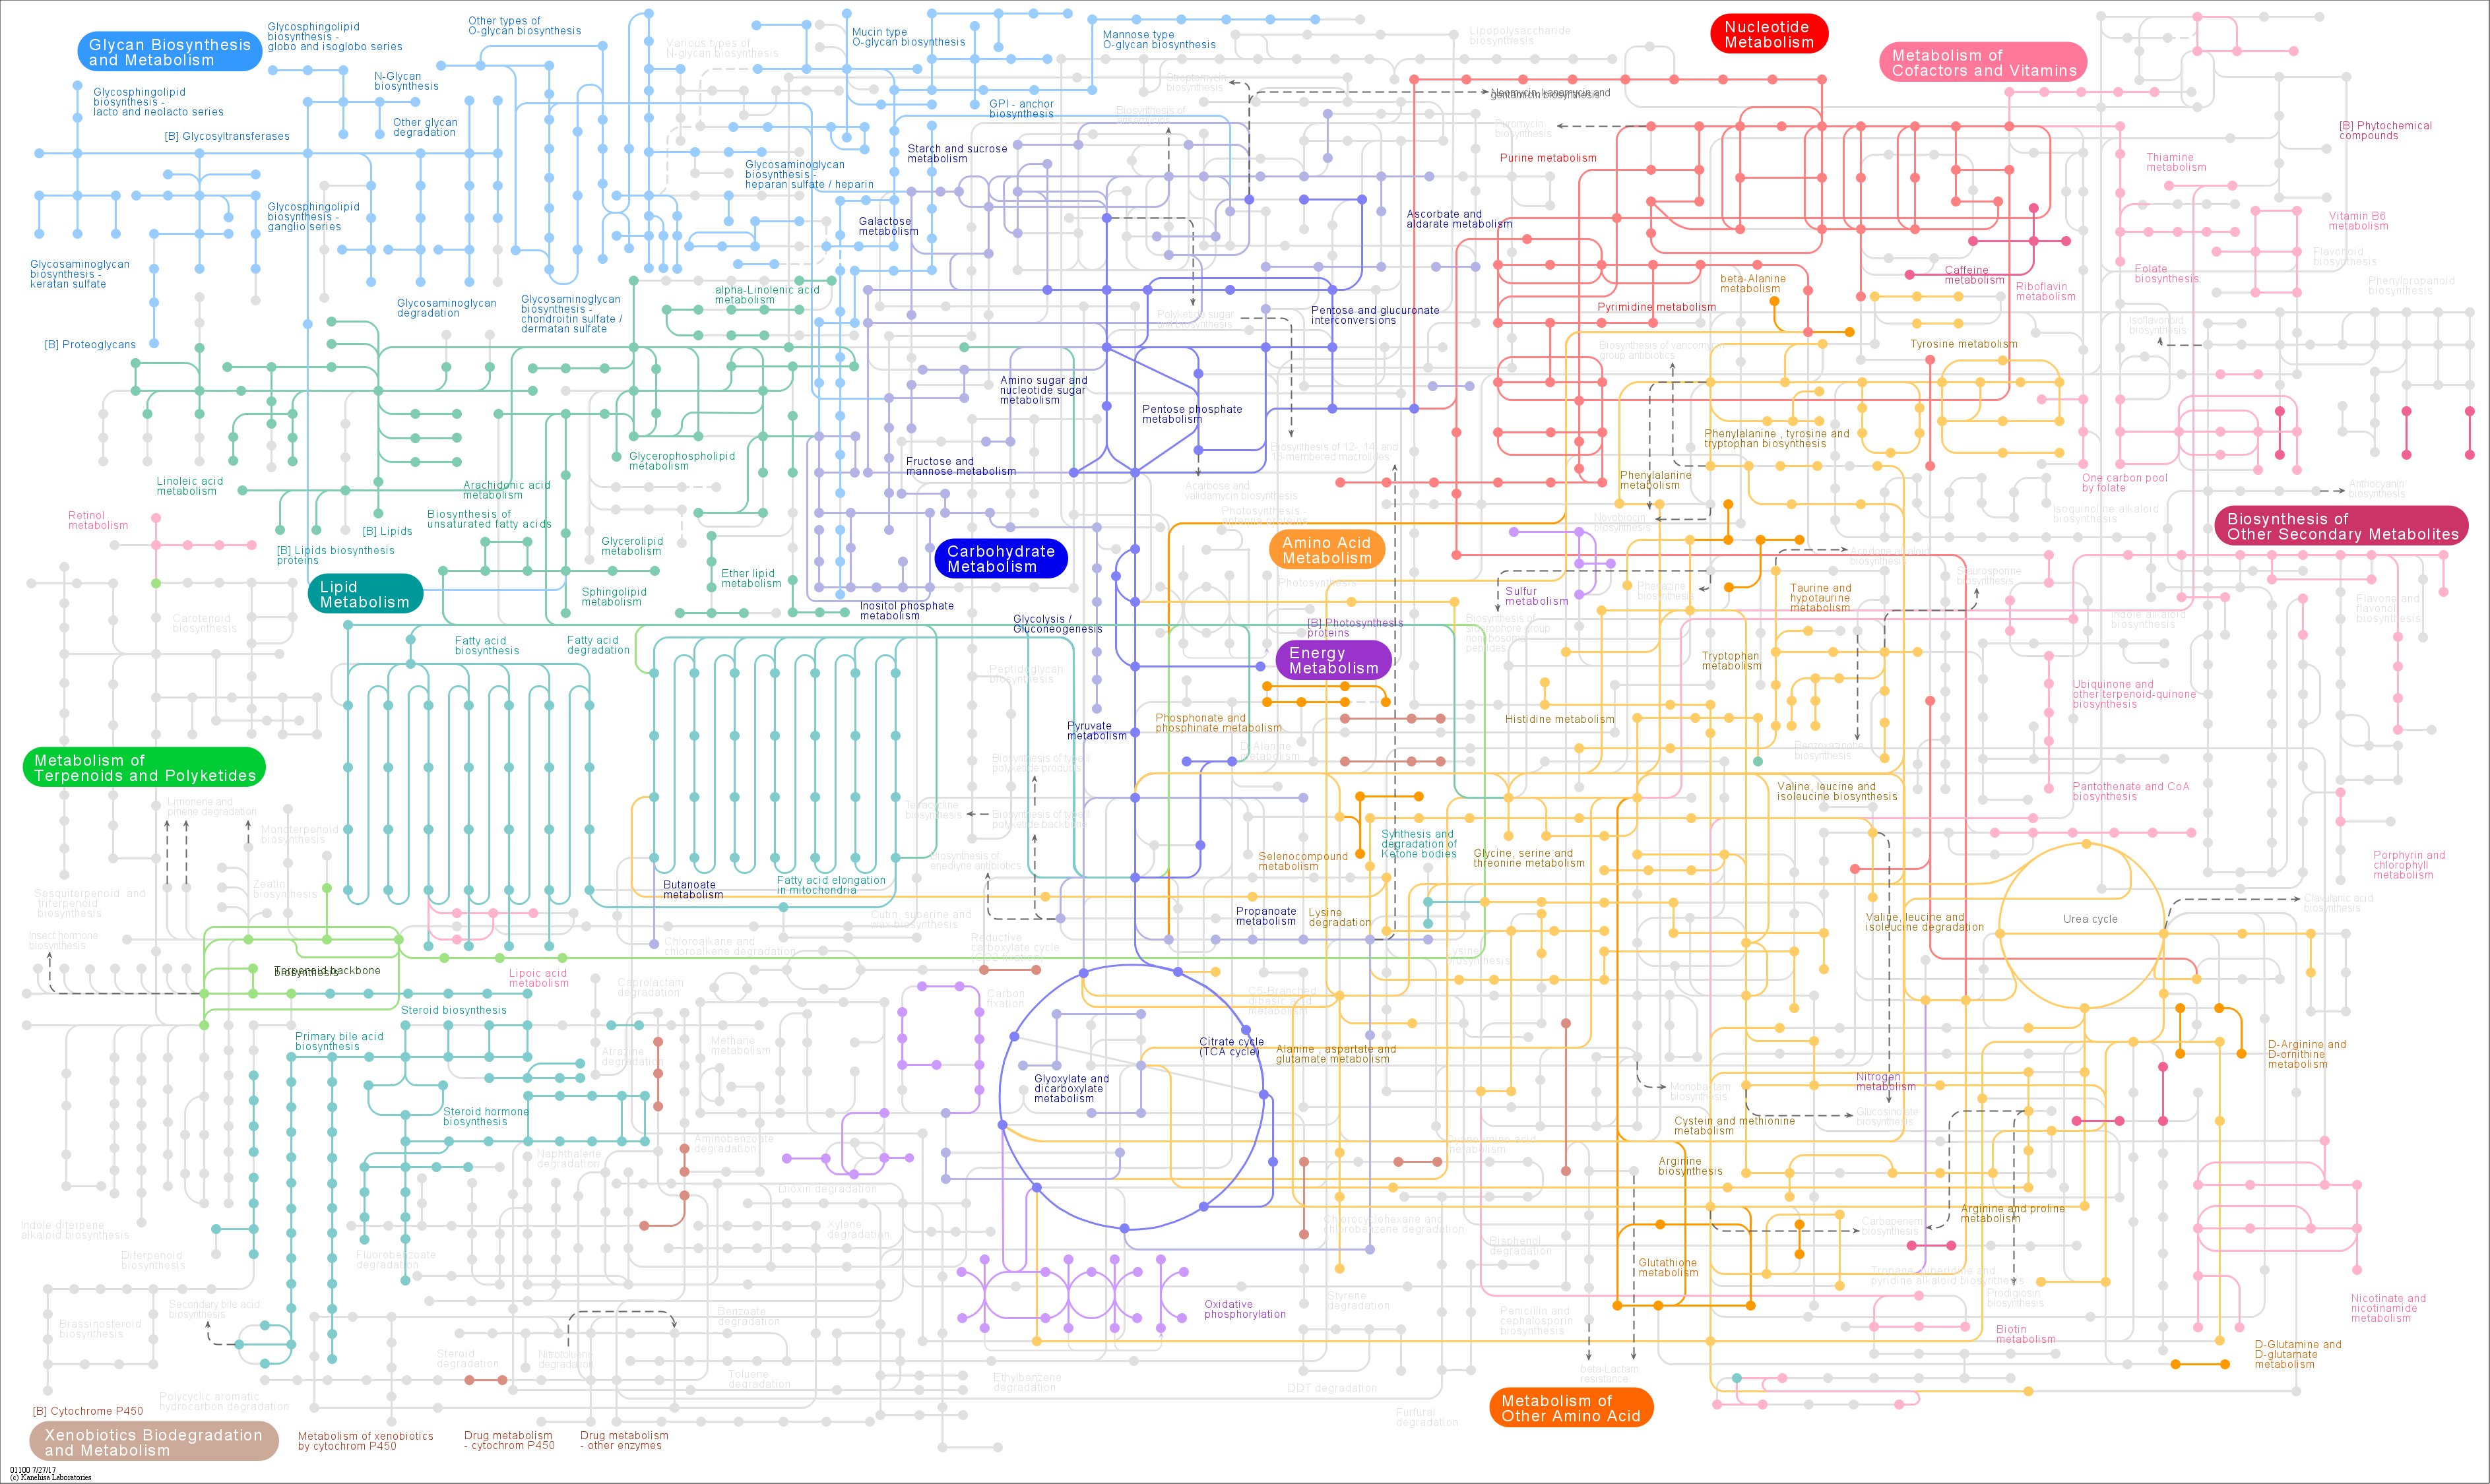

In [24]:
# Render central metabolism
Image(kegg_get("hsa01100", "image").read())

In [25]:
pathway = KGML_parser.read(kegg_get("ko00061", "kgml"))
canvas = KGMLCanvas(pathway, import_imagemap=True)
canvas.draw("fab_map_with_image.pdf")
PDF("fab_map_with_image.pdf")

In [27]:
print pathway.orthologs[0]

Entry node ID: 18
Names: ko:K02371
Type: ortholog
Components: set([])
Reactions: rn:R04969
Graphics elements: 1 [<Bio.KEGG.KGML.KGML_pathway.Graphics object at 0x7f3d3b160c10>]



In [28]:
pathway.orthologs[0].graphics

In [29]:


element = pathway.orthologs[0].graphics[0]
attrs = [element.name, element.x, element.y, element.coords, element.type, 
         element.width, element.height, element.fgcolor, element.bgcolor, 
         element.bounds, element.centre]
print '\n'.join([str(attr) for attr in attrs])



K02371
1037.0
606.0
None
rectangle
46.0
17.0
#000000
#BFBFFF
[(1014.0, 597.5), (1060.0, 614.5)]
(1037.0, 606.0)


In [30]:
# Helper function to convert colour as RGB tuple to hex string
def rgb_to_hex(rgb):
    rgb = tuple([int(255*val) for val in rgb])
    return '#' + ''.join([hex(val)[2:] for val in rgb]).upper()


In [31]:
# Define arbitrary colours
colorspiral = ColorSpiral()
colorlist = colorspiral.get_colors(len(pathway.orthologs))

# Change the colours of ortholog elements
for color, element in zip(colorlist, pathway.orthologs):
    for graphic in element.graphics:
        graphic.bgcolor = rgb_to_hex(color)


In [32]:
canvas = KGMLCanvas(pathway, import_imagemap=True)
canvas.draw("fab_map_new_colours.pdf")
PDF("fab_map_new_colours.pdf")

In [33]:
# Change the sizes of compound elements
for size, element in zip(range(8, 8+len(pathway.compounds)), pathway.compounds):
    for graphic in element.graphics:
        graphic.width = size
        graphic.height = size        

In [34]:


canvas = KGMLCanvas(pathway, import_imagemap=True)
canvas.draw("fab_map_new_sizes.pdf")
PDF("fab_map_new_sizes.pdf")

